## 项目描述
1:
项目概览：
使用 StatLib 的加州房产价格数据集，建立一个加州房价模型，已有数据集包含每个街区组的人口、收入中位数、房价中位数等指标。
模型要利用现有数据集进行学习，然后根据其他指标，预测房价的中位数。

## 2: 下载数据或准备数据

In [5]:
import os
import tarfilele


#从网络获取所需要的数据集
HOUSING_URL = DOWNLOAD_ROOT+HOUSING_PATH+'housing.tgz'
def fetch_housing_data(housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    housing_tgz = tarfilele.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

# fetch_housing_data()    

ModuleNotFoundError: No module named 'tarfilele'

In [6]:
# 为了方便，数据集已保存在datasets的housing文件夹下，用pandas对数据进行加载

import pandas as pd


csv_path = './datasets/housing/housing.csv'
housing_data = pd.read_csv(csv_path)

#利用head 函数，显示数据前5行
housing_data.head()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# 在加载完数据后，为了对数据有一个直观的了解，调用info函数和describe函数，查看数据中包含的字段和数值型字段的基本信息
# 发现数据集共2-640行，其中total_bedroom含有NAN值
# 数据集含10个字段，经度、维度、房屋年龄中位数、总房间数、总卧室数、人口数、家庭数、收入中位数、房屋价值中位数、离大海距离
# 数据中ocean_proximity为非数值型字段

housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
# 因为ocean_proximity 不是数值型数据，利用value_counts函数查看该字段的所有取值
# 可以发现，ocean_proximity 有5个取值
housing_data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

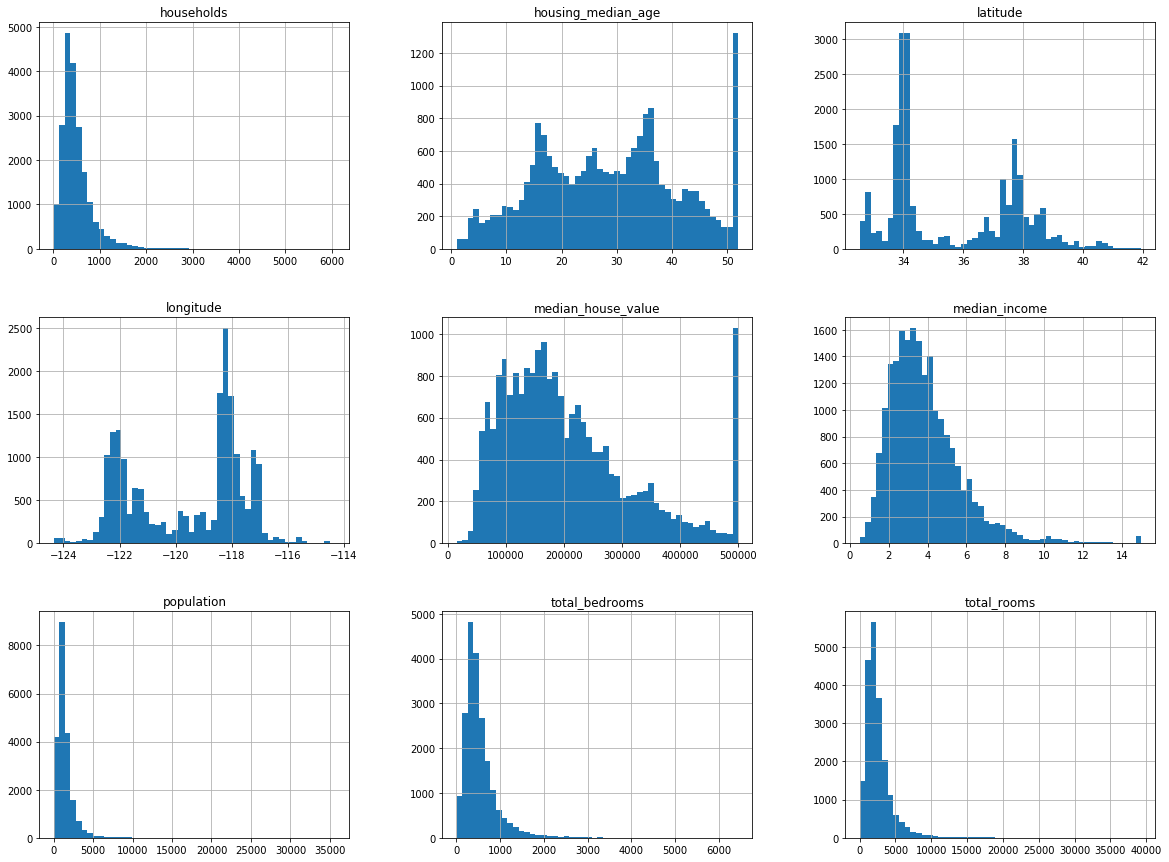

In [10]:
# 通过matplotlib 进行画图分析
# 通过作图分析和describe函数描述可知，在housing_median_age中，达到（或超过）50年的房子会被标记为50年，在median_house_value中，房价中位数达到（或超过）50万的房子也会被标记成50万
# 在income（个人收入）中，收入以万为单位
#因此在之后的建模以前，数据要进行归一化处理

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

housing_data.hist(bins=50,figsize = (20,15))
plt.show()

### 创建测试集

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split

# 利用sklearn中的train_test_split函数，将housing_data数据分为迅雷数据和测试数据，其中测试数据占0.2
# 这里采用的随机取样
train_set, test_set = train_test_split(housing_data, test_size=0.2, random_state=42)


In [12]:
# 查看皮尔逊相关系数可值，收入情况和房价中位数之间有0.68的相关性，因此将收入提出来进行整理分析
housing_data.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


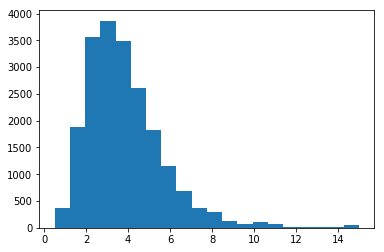

In [13]:
plt.hist(housing_data['median_income'],bins=20);

In [14]:
# 由以上作图分析得到，收入水平主要集中在1-6万之间，为便于分析，增加字段income_cat将收入进行分层。
# 并将收入大于5万的利用where函数化为5

housing_data["income_cat"] = np.ceil(housing_data["median_income"] / 1.5)
housing_data["income_cat"].where(housing_data["income_cat"] < 5, 5.0, inplace=True)

In [15]:
# 现在根据收入进行分类后，进行分层采样

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits =1,test_size = 0.2,random_state=42)

for train_index, test_index in split.split(housing_data, housing_data["income_cat"]):
    strat_train_set = housing_data.loc[train_index]
    strat_test_set = housing_data.loc[test_index]



In [16]:
# 查看各收入水平占比情况
housing_data['income_cat'].value_counts()/len(housing_data)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [17]:
# 删除income_cat 属性

for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True)

## 3：数据探索和可视化，发现规律


In [18]:
housing = strat_train_set.copy()
housing.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


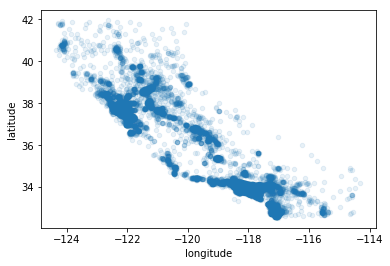

In [19]:
# 地理数据可视化,指定alpha=0.1
housing.plot(kind='scatter',x='longitude',y = 'latitude',alpha=0.1);

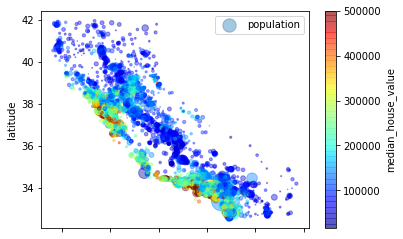

In [20]:
#每个圈的半径表示街区的人口（选项s），颜色代表价格（选项c）。
#我们用预先定义的名为jet的颜色图（选项cmap），它的范围是从蓝色（低价）到红色（高价）：
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population",
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [21]:
# 通过上图大体看出，房价与靠海的位置和人口密度联系密切，再次查看皮尔逊系数
# 相关系数的范围是 -1 到 1。当接近 1 时，意味强正相关；例如，当收入中位数增加时，房价中位数也会增加。
#当相关系数接近 -1 时，意味强负相关
# 相关系数只描述线性关系，忽略非线性关系

corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


D:\pycharm\Jupyter\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys


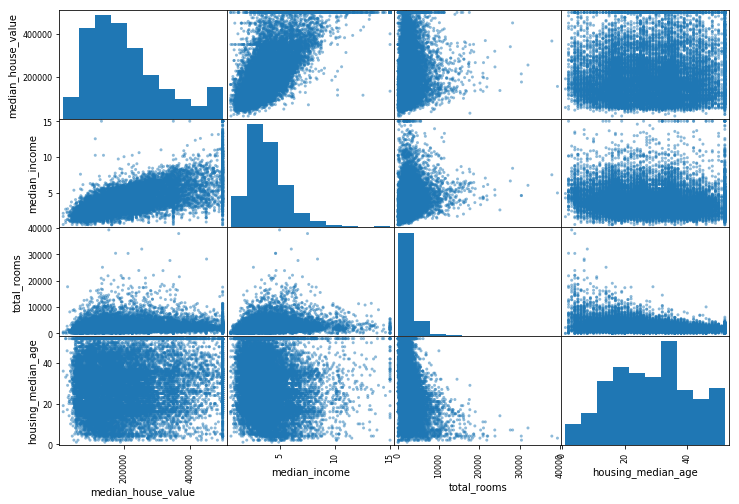

In [22]:
# 利用pandas 的scatter_matrix函数检测相关系数

from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes],figsize = (12,8));

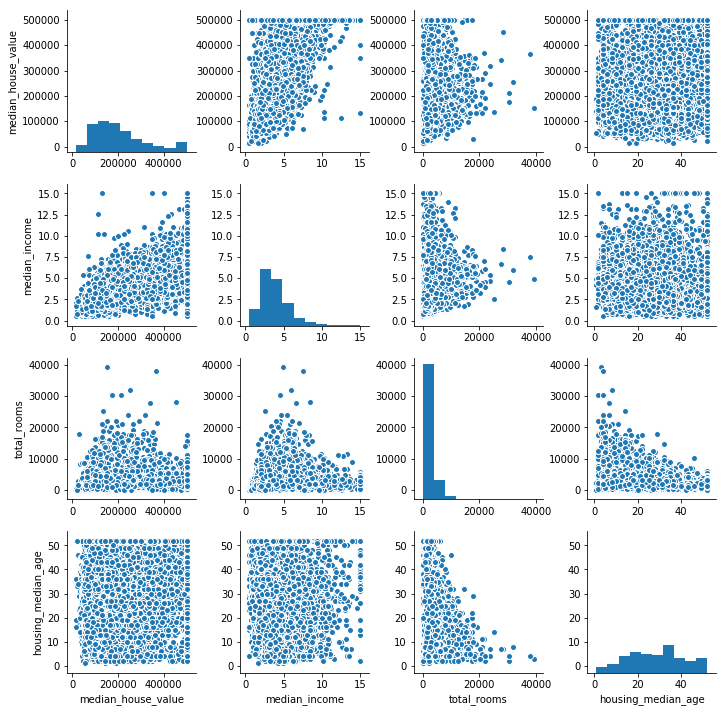

In [23]:
# 利用seaborn进行做出效果更美观的图
import seaborn as sns


sns.pairplot(housing[attributes])

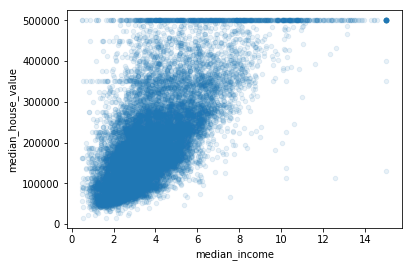

In [24]:
#  根据上图，将收入和房价单独作图
# 经作图发现，收入和房价相关性非常高，数据点比较集中
# 房价的最高点在5万（一条水平线）
# 还有一些比较模糊的线，4.5万，3.5万，2.8万
housing.plot(kind="scatter", x="median_income",y="median_house_value",
             alpha=0.1)

In [25]:
# 由原数据，得到了'total_rooms','total_bedrooms', 'population', 'households’等值，线根据经验
# 尝试进行属性组合实验。
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [26]:
# 再次利用皮尔逊相关系数可以看出，房价与我们生成的几个组合属性有了一定的相关性。
#与总房间数或卧室数相比，新的bedrooms_per_room属性与房价中位数的关联更强。
#显然，卧室数/总房间数的比例越低，房价就越高。每户的房间数也比街区的总房间数的更有信息，很明显，房屋越大，房价就越高。


corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

## 4为机器学习算法准备数据

In [27]:
# 再次利用分层采样的干净数据集，并将房价作为label值
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### 数据清洗，缺失值处理

由于total_bedrooms里有缺失值，可以通过去掉整个属性或者去掉对应的街区等方式进行处理，
同时，也可以采用赋值的方式进行处理，这里我采用赋值的方式进行处理。
pandas里有dropna(),drop(),fillna()方法。可以方便的实现。

housing.dropna(subset=["total_bedrooms"])    # 选项1

housing.drop("total_bedrooms", axis=1)       # 选项2

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)     # 选项3


In [28]:
# sklearn 里的Impyter函数实现上诉第三种缺失值处理
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy = 'median')
housing_num = housing.drop('ocean_proximity',axis = 1)


imputer.fit(housing_num)
imputer.statistics_

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [29]:
X = imputer.transform(housing_num)

# 将 X转为Dataframe格式
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### 文本处理（ocean_proximity）

In [30]:
# 利用sklearn提供的转换器LabelEncoder

from sklearn.preprocessing import LabelEncoder 

encoder = LabelEncoder()

housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ..., 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [31]:
#  数值化后，再对该数据进行onehot编码

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

#  将稀疏矩阵转为numpy数组
housing_cat_1hot.toarray()


array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       ..., 
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.]])

In [32]:
# 可以直接用LabelBinarizer实现Labelencoder + OnehotEncoder   

# from sklearn.preprocessing import LabelBinarizer
# encoder = LabelBinarizer()
# housing_cat_2hot = encoder.fit_transform(housing_cat)
# housing_cat_2hot

In [33]:
X

array([[ -121.89  ,    37.29  ,    38.    , ...,   710.    ,   339.    ,
            2.7042],
       [ -121.93  ,    37.05  ,    14.    , ...,   306.    ,   113.    ,
            6.4214],
       [ -117.2   ,    32.77  ,    31.    , ...,   936.    ,   462.    ,
            2.8621],
       ..., 
       [ -116.4   ,    34.09  ,     9.    , ...,  2098.    ,   765.    ,
            3.2723],
       [ -118.01  ,    33.82  ,    31.    , ...,  1356.    ,   356.    ,
            4.0625],
       [ -122.45  ,    37.77  ,    52.    , ...,  1269.    ,   639.    ,
            3.575 ]])

### 特征缩放

### 常见的为归一化或标准化
线性函数归一化（许多人称其为归一化（normalization））很简单：值被转变、重新缩放，直到范围变成 0 到 1。我们通过减去最小值，然后再除以最大值与最小值的差值，来进行归一化。Scikit-Learn 提供了一个转换器MinMaxScaler来实现这个功能。它有一个超参数feature_range，可以让你改变范围，如果不希望范围是 0 到 1。


标准化：首先减去平均值（所以标准化值的平均值总是 0），然后除以方差，使得到的分布具有单位方差。与归一化不同，标准化不会限定值到某个特定的范围，这对某些算法可能构成问题（比如，神经网络常需要输入值得范围是 0 到 1）。但是，标准化受到异常值的影响很小。例如，假设一个街区的收入中位数由于某种错误变成了100，归一化会将其它范围是 0 到 15 的值变为 0-0.15，但是标准化不会受什么影响。Scikit-Learn 提供了一个转换器StandardScaler来进行标准化。

### 在这里基于BaseEstimator TransformerMixin 两个基类，自定义了CategoricalEncoder，CombinedAttributesAdder两个转换器。
其中CategoricalEncoder实现了原始数据集的imouter和onehot编码，
CombinedAttributesAdder实现增加属性功能

In [42]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        
        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out
"""
转换方法：
"""
# from sklearn.preprocessing import CategoricalEncoder # in future versions of Scikit-Learn

cat_encoder = CategoricalEncoder()
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat_reshaped)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [40]:
from sklearn.pipeline import  Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer',Imputer(strategy = 'median')),
    ('attribs_addr',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


### sklearn Pipeline构造器需要一个定义步骤顺序的名字/估计器对的列表。除了最后一个估计器，其余都要是转换器（即，它们都要有fit_transform()方法）。名字可以随意起。

当你调用流水线的fit()方法，就会对所有转换器顺序调用fit_transform()方法，将每次调用的输出作为参数传递给下一个调用，一直到最后一个估计器，它只执行fit()方法。

流水线暴露相同的方法作为最终的估计器。在这个例子中，最后的估计器是一个StandardScaler，它是一个转换器，因此这个流水线有一个transform()方法，可以顺序对数据做所有转换（它还有一个fit_transform方法可以使用，就不必先调用fit()再进行transform()）。

对分类值应用LabelBinarizer：Scikit-Learn 提供了一个类FeatureUnion实现这个功能。你给它一列转换器（可以是所有的转换器），当调用它的transform()方法，每个转换器的transform()会被并行执行，等待输出，然后将输出合并起来，并返回结果（当然，调用它的fit()方法就会调用每个转换器的fit()）。一个完整的处理数值和类别属性的流水线如下所示：

In [41]:
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator,TransformerMixin


class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

#对数值型数据的操作
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

#对非数值型数据的操作
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', CategoricalEncoder()),
    ])

# FeatureUnion 和pipeline类似
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


### 现在，经过上面种种探索和尝试，制作成简单的流水线

In [44]:
# housing数据集是进行分层采样后的未做处理的训练array数据

housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape


(16512, 16)

## 选择并训练模型

###  1：线性回归模型


In [50]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

# 查看各特征值的系数
print(lin_reg.coef_)
# 查看截距
print(lin_reg.intercept_)

[ -55650.41177203  -56716.45239756   13732.83873382   -1933.1277134
    7330.04063974  -45708.26297569   45455.47522487   74714.39169625
    6605.12799249    1042.95792416    9249.7590653    11907.55244686
  -25295.07567894  140281.86024347    7444.23658526   15281.80946339]
206990.920724


In [53]:
# 利用
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels,housing_predictions)
print('lin_mse',lin_mse)

print('lin_rmse',np.sqrt(lin_mse))


lin_mse 4709829587.97
lin_rmse 68628.1981985


### 经过简单的线性回归，发现大多数街区的median_housing_values位于 ###$120000 到 $265000 之间，因而 $68628 将近一半，因此模型效果不好，发生了欠拟合，意味着特征没有提供足够多的信息来做出一个好的预测，或者模型并不强大。因此尝试其他的模型


### 2：决策树

In [65]:
# 尝试决策树模型

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(housing_predictions,housing_labels)
tree_rmse = np.sqrt(tree_mse)
print('tree_rmse',tree_rmse)



tree_rmse 0.0


In [60]:
# 上图由结果得，决策树可能发生了过拟合
# 这里尝试使用交叉验证进行确认

from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_labels,
                        scoring="neg_mean_squared_error", cv=10)

scores


array([ -4.76581906e+09,  -4.43313048e+09,  -4.75967502e+09,
        -4.74626014e+09,  -5.05630505e+09,  -5.66407622e+09,
        -4.88375402e+09,  -5.08875589e+09,  -5.86590896e+09,
        -4.72986428e+09])

In [61]:
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([ 69034.91192114,  66581.7578853 ,  68990.39803298,  68893.10664871,
        71107.70035196,  75260.05727074,  69883.86096963,  71335.51632306,
        76589.22222662,  68774.00876826])

### 通过以上发现，决策树存在很大的过拟合问题，虽然我可以尝试进行调整最大深度，节点数，叶节点数等减少拟合程度，但这里先尝试进行随机森林

### 随机森林


In [63]:
#随机森林

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [66]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

22514.332433198528

In [68]:
# 随机森林交叉验证
from  sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([ 52581.86145665,  50906.77033045,  51818.54036189,  55698.10216223,
        51729.36183249,  57423.46444884,  51126.51814691,  49612.32330675,
        55138.21196019,  53063.41434035])

### 经过3个模型比较，发现随机森林的效果比较好，但目前位置，所有的参数都是默认的，并未进行参数调整。在这里，通过sklearn的GridsearchCV进行尝试调参。


### 模型调参

In [70]:
from sklearn.model_selection import GridSearchCV
# 调整决策树个数，最大特征值，不放回采样，
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                          scoring = 'neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)



GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [74]:
# 获得最好的参数组合
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
# 将误差和参数对比进行逐一显示
cvres = grid_search.cv_results_
for mean_score,params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63868.5711333 {'max_features': 2, 'n_estimators': 3}
56194.3227313 {'max_features': 2, 'n_estimators': 10}
52730.3705902 {'max_features': 2, 'n_estimators': 30}
60659.0290412 {'max_features': 4, 'n_estimators': 3}
53124.7441375 {'max_features': 4, 'n_estimators': 10}
50690.5501261 {'max_features': 4, 'n_estimators': 30}
60096.4201157 {'max_features': 6, 'n_estimators': 3}
51942.9706782 {'max_features': 6, 'n_estimators': 10}
50028.8728751 {'max_features': 6, 'n_estimators': 30}
59287.4667299 {'max_features': 8, 'n_estimators': 3}
52256.2114877 {'max_features': 8, 'n_estimators': 10}
49982.9894657 {'max_features': 8, 'n_estimators': 30}
62399.3485425 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54529.3188089 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60153.8471487 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52827.9836615 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
59041.8470809 {'bootstrap': False, 'max_features': 4, 'n_estim

In [81]:
# 查看每个属性对做出准确预测的重要性
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([  6.75819326e-02,   6.36907685e-02,   4.35695839e-02,
         1.53672225e-02,   1.49106717e-02,   1.52123891e-02,
         1.45940538e-02,   3.84180978e-01,   4.33671391e-02,
         1.14415190e-01,   6.21568210e-02,   7.47844276e-03,
         1.47406043e-01,   1.05678881e-04,   2.10881928e-03,
         3.85426590e-03])

### 测试评估

In [83]:
# 参数确定
final_model = grid_search.best_estimator_
# 测试集
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# 测试集的流水化
X_test_prepared = full_pipeline.transform(X_test)

#测试集label值预测
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)  
print('final_test_rmse',final_rmse)

final_test_rmse 48093.1795748


### 到此，利用数据分析和机器学习预测房价中位数的分析过程基本完成，由于机器性能问题，参数调优并未完全考虑所有的参数，数据样本也不是很多。该项目会逐渐完善。